<a href="https://colab.research.google.com/github/ReidelVichot/PUA2022_RVichot/blob/main/classdemo/PhillyCitiBikes_partiallyFilledNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Bikeshare Data from rideindego.com

The outputs of this notebook have been remove so you can run it cell by cell and see what each line of code does

while the data is open and accessible it is stored in poorly maintained. It is stored in individual files for each quarter from 2016 through 2022 - zipped csv files (but occasionally additional files are indcluded in the compressed zip) and the naming scheme for the files is not systematic, which is very annoying, and also really common.
I use the ```urllib3``` library to download the page with all the links to the data files and ```BeautifulSoup`` to read the html page and extract the links. 

Additionally I use ```os``` and ```glob``` to downlead, and to find and open the data files after I downloaded them.

Later I use ```pandas``` to read the csv files in

For the geospatial analysis I will use
- ```shapely``` to create points and lines
- ```geopandas``` to plot
- ```folium``` for working with leaflet maps

Finally I will import the colormap tools from matplotlib to map colors to variables in my maps

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 36.4 MB/s 
     |████████████████████████████████| 16.7 MB 1.6 MB/s 


In [2]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# interacting with hosting site
import urllib3
from bs4 import BeautifulSoup

# getting and reading files
import os
import glob
import pandas as pd

# geospatial analysis 
from shapely.geometry import Point, LineString
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# I need to use matplotlib colormaps to map colors to variables' values

from matplotlib import cm

# getting the data


## get the links

In [4]:
http = urllib3.PoolManager()
c = http.request('GET', url="https://www.rideindego.com/about/data/")
soup = BeautifulSoup(c.data.decode('utf-8'))


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
#the webpage with the links
soup.prettify()

'<!DOCTYPE html>\n<!--[if lt IE 7]><html lang="en-US" class="no-js lt-ie9 lt-ie8 lt-ie7"><![endif]-->\n<!--[if (IE 7)&!(IEMobile)]><html lang="en-US" class="no-js lt-ie9 lt-ie8"><![endif]-->\n<!--[if (IE 8)&!(IEMobile)]><html lang="en-US" class="no-js lt-ie9"><![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="no-js" lang="en-US">\n <!--<![endif]-->\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>\n  <link href="https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/themes/indego/library/images/apple-touch-icon.png" rel="apple-touch-icon"/>\n  <link href="https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/themes/indego/library/images/favicon.png" rel="icon"/>\n  <!--[if IE]>\n\t\t\t<link rel="shortcut icon" href="https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/themes/indego/library/images/favicon.ico">\n\

In [6]:
#the list of links
linklist = [link.get('href') for link in soup.find_all('a') 
              if "upload" in link.get('href')]
linklist              

['https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2022/07/indego-trips-2022-q2.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2022/04/indego-trips-2022-q1.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2022/01/indego-trips-2021-q4.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/10/indego-trips-2021-q3.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/07/indego-trips-2021-q2.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/04/indego-trips-2021-q1.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2021/01/indego-trips-2020-q4.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2020/10/indego-trips-2020-q3.zip',
 'https://u626n26h74f16ig1p3pt0f2g-wpengine.netdna-ssl.com/wp-content/uploads/2020/08/indego-tri

## download and read the links

In [7]:
#downloading each link
for url in linklist:
  os.system("wget " + url)

In [8]:
#the list of files locally
glob.glob("*rips*")

['Indego_Trips_2015Q3.zip',
 'Indego_Trips_2016Q2.zip',
 'Q3_2016_trips.zip',
 'indego-trips-2022-q2.zip',
 'Indego_Trips_2016Q1.zip',
 'indego-trips-2019-q4.csv.zip',
 'indego-trips-2021-q2.zip',
 'indego_gbfs_trips_Q2_2017.csv.zip',
 'indego_gbfs_trips_Q1_2017.zip',
 'indego-trips-2019-q1.csv.zip',
 'indego-trips-2018-q1.csv.zip',
 'indego-trips-2017-q3.csv.zip',
 'indego-trips-2017-q4.csv.zip',
 'indego-trips-2021-q4.zip',
 'indego-trips-2020-q3.zip',
 'indego-trips-2022-q1.zip',
 'indego-trips-2021-q1.zip',
 'indego-trips-2021-q3.zip',
 'indego-trips-2020-q4.zip',
 'indego-trips-2020-q2.zip',
 'indego-trips-2018-q2.csv.zip',
 'indego-trips-2018-q4.csv.zip',
 'Indego_Trips_2015Q2.zip',
 'Indego_trips_Q4_2016.zip',
 'indego-trips-2020-q1.csv.zip',
 'indego-trips-2019-q3-1.zip',
 'Indego_Trips_2015Q4.zip',
 'indego-trips-2019-q2.csv.zip',
 'indego-trips-2018-q3.csv.zip']

In [9]:
# read in the csv file - each file is read in into a "dictionary" - the data can then be retrieved by year and quarder:
# e.g. pds[2016][Q1] retrieves the data from 2016 January 1st through 2016 March 31st
pds = {} # prepare the container
for y in range(2015, 2023): #loop over all years
  print(y)
  pds[y] = {}
  _ = [url for url in glob.glob("*rips*") if ("%d"%y in url)]
  for q in range(1, 5):
    print("\t", q)
    try:
      pds[y][q] = pd.read_csv([url for url in _ 
                             if ("Q%d"%q in url) or ("q%d"%q in url)][0])
    except ValueError:
      os.system("unzip " + [url for url in _ 
                             if ("Q%d"%q in url) or ("q%d"%q in url)][0])
      try:
        pds[y][q] = pd.read_csv([url for url in glob.glob("*rips*csv") if (("%d"%y in url) and 
                                (("Q%d"%q in url) or ("q%d"%q in url)))][0])
      except IndexError:
        print("\t\tno data for this quarter")
    except IndexError:
      print("\t\tno data for this quarter")

2015
	 1
		no data for this quarter
	 2
	 3


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


	 4
2016
	 1
	 2
	 3
	 4
2017
	 1
	 2
	 3
	 4
2018
	 1
	 2
	 3
	 4
2019
	 1
	 2
	 3
	 4
2020
	 1
	 2
	 3
	 4
2021
	 1
	 2
	 3
	 4
2022
	 1
	 2
	 3
		no data for this quarter
	 4
		no data for this quarter


# explore the data

In [10]:
#get the info for each year and each quarter
for y in pds.keys(): #years look
  for q in pds[y].keys(): #quarter loop
    print(pds[y][q].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119559 entries, 0 to 119558
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              119559 non-null  int64  
 1   duration             119559 non-null  int64  
 2   start_time           119559 non-null  object 
 3   end_time             119559 non-null  object 
 4   start_station_id     119559 non-null  int64  
 5   start_lat            119559 non-null  float64
 6   start_lon            119559 non-null  float64
 7   end_station_id       119559 non-null  int64  
 8   end_lat              119559 non-null  float64
 9   end_lon              119559 non-null  float64
 10  bike_id              118649 non-null  float64
 11  plan_duration        119559 non-null  int64  
 12  trip_route_category  119559 non-null  object 
 13  passholder_type      119559 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 12.8+ MB
None
<clas

In [11]:
#get the number of rows and columns for each year and quarter
for y in pds.keys(): #year loop
  for q in pds[y].keys(): #quarter loop
    print(y, "Q%d"%q, ("(rows, columns)"), pds[y][q].shape)

2015 Q2 (rows, columns) (119559, 14)
2015 Q3 (rows, columns) (188368, 14)
2015 Q4 (rows, columns) (121783, 14)
2016 Q1 (rows, columns) (73169, 14)
2016 Q2 (rows, columns) (170824, 14)
2016 Q3 (rows, columns) (234946, 14)
2016 Q4 (rows, columns) (176119, 14)
2017 Q1 (rows, columns) (107772, 14)
2017 Q2 (rows, columns) (220441, 14)
2017 Q3 (rows, columns) (276785, 14)
2017 Q4 (rows, columns) (183909, 14)
2018 Q1 (rows, columns) (98993, 14)
2018 Q2 (rows, columns) (201624, 14)
2018 Q3 (rows, columns) (228329, 15)
2018 Q4 (rows, columns) (142872, 15)
2019 Q1 (rows, columns) (96593, 15)
2019 Q2 (rows, columns) (206354, 15)
2019 Q3 (rows, columns) (275197, 15)
2019 Q4 (rows, columns) (166116, 15)
2020 Q1 (rows, columns) (118190, 15)
2020 Q2 (rows, columns) (186586, 15)
2020 Q3 (rows, columns) (269985, 15)
2020 Q4 (rows, columns) (160401, 15)
2021 Q1 (rows, columns) (96281, 15)
2021 Q2 (rows, columns) (232195, 15)
2021 Q3 (rows, columns) (300432, 15)
2021 Q4 (rows, columns) (330220, 15)
2022 

In [12]:
# an example of a file # 2022-July thorugh 2022-September
pds[2021][3].head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,398698761,11,7/1/2021 0:00,7/1/2021 0:11,3045,39.947922,-75.162369,3030,39.939350,-75.157158,3360,30,One Way,Indego30,standard
1,398698759,4,7/1/2021 0:02,7/1/2021 0:06,3052,39.947319,-75.156952,3238,39.946281,-75.151382,5420,30,One Way,Indego30,standard
2,398698757,56,7/1/2021 0:03,7/1/2021 0:59,3192,39.962070,-75.141113,3161,39.954861,-75.180908,18450,30,One Way,Indego30,electric
3,398698755,55,7/1/2021 0:04,7/1/2021 0:59,3192,39.962070,-75.141113,3161,39.954861,-75.180908,16508,30,One Way,Indego30,electric
4,398698753,5,7/1/2021 0:08,7/1/2021 0:13,3052,39.947319,-75.156952,3046,39.950119,-75.144722,3475,365,One Way,Indego365,standard


In [13]:
pds[2021][3].describe()


,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration
count,3.004320e+05,300432.000000,300432.000000,300412.000000,300412.000000,300432.000000,296273.000000,296273.000000,300432.000000
mean,4.134962e+08,18.858880,3103.809827,39.952136,-75.169267,3102.941684,39.951943,-75.169025,77.623655
std,8.603314e+06,48.931549,73.620408,0.012410,0.016551,74.181687,0.012462,0.016559,122.491870
min,3.986987e+08,1.000000,3000.000000,39.889938,-75.226372,3000.000000,39.889938,-75.226372,1.000000
25%,4.058970e+08,7.000000,3040.000000,39.945610,-75.179710,3039.000000,39.945610,-75.179710,30.000000
50%,4.135417e+08,11.000000,3078.000000,39.951340,-75.167831,3077.000000,39.951340,-75.167580,30.000000
75%,4.211006e+08,19.000000,3168.000000,39.959240,-75.158882,3168.000000,39.959229,-75.158211,30.000000
max,4.286479e+08,1440.000000,3256.000000,39.991791,-75.129936,3256.000000,39.991791,-75.129936,365.000000


# data preprocessing

convert date column to a datetime object


In [14]:
pds[2021][3]["start_date"] = pd.to_datetime(pds[2021][3]["start_time"]).dt.date

create shapely points (```shapely.Point```) from the latitude-longitude values of the start station for each trip

note that I use the ```df.apply()``` method which is a method of the dataframes that applies a function to each row in the dataframe sequentially. 

The function is created in place with the ```lambda``` methods: 

```lambda x : x/2``` 
is equivalent to

``` 
def func(x):
return x/2
```

so the function im applying is 

```
Point(longitude, latitude)
```



In [15]:
# create a point from the latitude-longitude values of the start of the trip
pds[2021][3]["startlonlat"] = pds[2021][3][["start_lon", "start_lat"]].apply(lambda x: 
                          Point(x['start_lon'], x['start_lat']), axis=1)


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [16]:
# create a point from the latitude-longitude values of the end of the trip
pds[2021][3]["endlonlat"] = pds[2021][3][["end_lon", "end_lat"]].apply(lambda x: 
                          Point(x['end_lon'], x['end_lat']), axis=1)


I try to create a line between the start and end trip points for each trip, but this fails because some rows have incorrect lat-long value pairs

In [17]:
# create a line between the start and end positions... not so easy!
pds[2021][3][["startlonlat", "endlonlat"]].apply(lambda x:
              LineString([x["startlonlat"], x["endlonlat"]]), axis=1)

IndexError: ignored

To fix this I explicitly create the function that will be applied and include a try/except condition: this means if the code tries to run but it encounters the specific error I expect, IndexError, it will not crash but instead behave in a different way (create a line between (0,0), and (0,0) )

In [18]:
def makeline(x, y):
  try: 
    _ = LineString([x, y])
  except IndexError:
    _ =  LineString([(0,0), (0,0)])
  return _

pds[2021][3]["trip"] = pds[2021][3][["startlonlat", "endlonlat"]].apply(lambda x: 
                          makeline(x["startlonlat"], x["endlonlat"]), axis=1)

## clean up some data

remove round trips

In [19]:
#get only the 1-way trips
tripdf = pds[2021][3]
tripdf = tripdf[tripdf["trip_route_category"] == "One Way"]

remove missing values

In [20]:
#remove the trips with missing coordinates
tripdf = tripdf[~tripdf["start_lat"].isna()]
tripdf = tripdf[~tripdf["end_lat"].isna()]


In [21]:
print("the final size of the dataset is (rows, columns)=", tripdf.shape)

the final size of the dataset is (rows, columns)= (269796, 19)


# mapping and geospatial analysis

#simple plots with geopandas: I can plot the bike station locations


In [22]:
#convert the 2021-Q3 data dataframe to a geodataframe
#geodataframes need a "geometry" column to plot
#assign the lat-lon point of trip start to the geometry column
gpds = pds[2021][3]
gpds = gpd.GeoDataFrame(gpds)
gpds["geometry"] = gpds["startlonlat"] # associate the trip trajectories to the geometry in the geodataframe

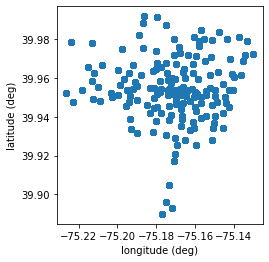

In [23]:
ax = gpds.plot()
ax.set_xlabel("longitude (deg)")
ax.set_ylabel("latitude (deg)");

I can plot the trip trajectories of each trip (takes a while cause its a lot of trips

In [24]:
#set geometry to the trip column
gpds["geometry"] = gpds["trip"] # associate the trip trajectories to the geometry in the geodataframe

## plot the zipcodes of Philly

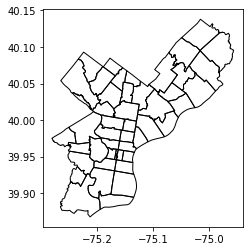

In [25]:
# get the zipcode dataframe
zips = gpd.GeoDataFrame.from_file("https://opendata.arcgis.com/api/v3/datasets/b54ec5210cee41c3a884c9086f7af1be_0/downloads/data?format=shp&spatialRefId=4326")
zips.plot(ec = "k", fc="none");

In [26]:
# what is the coordinate system for the geo data? 
zips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
#set the same coordinate system for the bike trajectories
gpds.crs = zips.crs

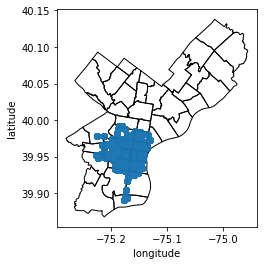

In [28]:
#plot stations over the zip codes map
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds["geometry"] = gpds["startlonlat"] # associate the trip trajectories to the geometry in the geodataframe
gpds.plot(ax = ax, alpha=0.1)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("longitude")
ax.set_ylabel("latitude");

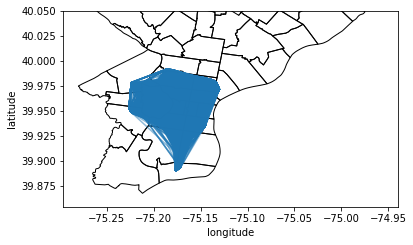

In [29]:
#plot trip trajectories over the zipcode maps 
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds["geometry"] = gpds["trip"] # associate the trip trajectories to the geometry in the geodataframegpds[:100].plot(ax = ax, alpha=0.5)
gpds.plot(ax = ax, alpha=0.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim[0], 40.05);
ax.set_xlabel("longitude")
ax.set_ylabel("latitude");

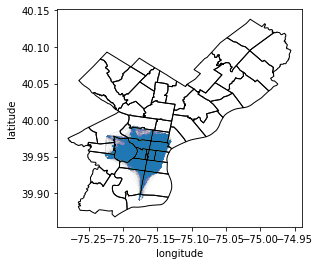

In [30]:
#plot trip trajectories over the zipcode maps 
#decrease the transparency to better see the liens
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds.plot(ax = ax, alpha=0.005)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel("longitude")
ax.set_ylabel("latitude");

measure trip length

In [31]:
#measure trip length
gpds["triplen"] = gpds.geometry.length
gpds.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,trip_id,duration,start_station,start_lat,start_lon,end_station,end_lat,end_lon,plan_duration,triplen
count,3.004320e+05,300432.000000,300432.000000,300412.000000,300412.000000,300432.000000,296273.000000,296273.000000,300432.000000,300432.000000
mean,4.134962e+08,18.858880,3103.809827,39.952136,-75.169267,3102.941684,39.951943,-75.169025,77.623655,0.015699
std,8.603314e+06,48.931549,73.620408,0.012410,0.016551,74.181687,0.012462,0.016559,122.491870,0.011446
min,3.986987e+08,1.000000,3000.000000,39.889938,-75.226372,3000.000000,39.889938,-75.226372,1.000000,0.000000
25%,4.058970e+08,7.000000,3040.000000,39.945610,-75.179710,3039.000000,39.945610,-75.179710,30.000000,0.007801
50%,4.135417e+08,11.000000,3078.000000,39.951340,-75.167831,3077.000000,39.951340,-75.167580,30.000000,0.013944
75%,4.211006e+08,19.000000,3168.000000,39.959240,-75.158882,3168.000000,39.959229,-75.158211,30.000000,0.021775
max,4.286479e+08,1440.000000,3256.000000,39.991791,-75.129936,3256.000000,39.991791,-75.129936,365.000000,0.090212


In [32]:
#normalize trip lenght
#max of len is .090212
c = cm.viridis(gpds["triplen"] / (0.090212))

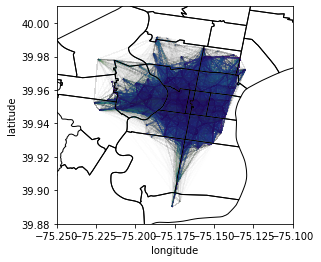

In [33]:
#map color of the trip to trip length
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax = gpds.plot(ax = ax, alpha=0.002, 
                color = cm.viridis(gpds["triplen"] / (0.090212)))
ax.set_xlim(-75.25, -75.1)
ax.set_ylim(39.880, 40.01)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude");

## mapping on top of a map layer

### get a leaflet map

In [34]:
#Define coordinates of where we want to center our map
phl = [39.952583,  -75.165222]

#Create the map
my_map = folium.Map(location=phl, zoom_start=12)

#Display the map
my_map

### find the stations' coordinates

Find the individual stations (deduplicate trips that start in the same place)

In [35]:
stations = gpds.groupby("start_station").first()
stations.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,start_date,startlonlat,endlonlat,trip,geometry,triplen
start_station,,,,,,,,,,,,,,,,,,,,
3000,399093263,37,7/2/2021 15:35,7/2/2021 16:12,NaN,NaN,3157,39.925449,-75.159538,19091,365,One Way,Indego365,electric,2021-07-02,POINT EMPTY,POINT (-75.159538 39.925449),"LINESTRING (0 0, 0 0)","LINESTRING (0.00000 0.00000, 0.00000 0.00000)",0.000000
3004,398758923,15,7/1/2021 7:41,7/1/2021 7:56,39.953781,-75.163742,3038,39.947811,-75.194092,14690,30,One Way,Indego30,standard,2021-07-01,POINT (-75.163742 39.953781),POINT (-75.194092 39.947811),"LINESTRING (-75.163742 39.953781, -75.194092 3...","LINESTRING (-75.16374 39.95378, -75.19409 39.9...",0.030932
3005,398698706,11,7/1/2021 1:17,7/1/2021 1:28,39.947330,-75.144028,3025,39.937241,-75.161201,14488,30,One Way,Indego30,standard,2021-07-01,POINT (-75.144028 39.94733),POINT (-75.161201 39.937241),"LINESTRING (-75.144028 39.94733, -75.161201 39...","LINESTRING (-75.14403 39.94733, -75.16120 39.9...",0.019917
3006,398698703,4,7/1/2021 1:22,7/1/2021 1:26,39.952202,-75.203110,3208,39.950481,-75.193237,17055,30,One Way,Indego30,electric,2021-07-01,POINT (-75.20311 39.952202),POINT (-75.193237 39.950481),"LINESTRING (-75.20311 39.952202, -75.193237 39...","LINESTRING (-75.20311 39.95220, -75.19324 39.9...",0.010022
3007,398698739,6,7/1/2021 0:14,7/1/2021 0:20,39.945171,-75.159927,3213,39.938869,-75.166634,19676,30,One Way,Indego30,electric,2021-07-01,POINT (-75.159927 39.945171),POINT (-75.166634 39.938869),"LINESTRING (-75.159927 39.945171, -75.166634 3...","LINESTRING (-75.15993 39.94517, -75.16663 39.9...",0.009203


In [36]:
#just in case
stations = stations.dropna()

the latlon pairs of coordinates in a ```shapely.Point``` object can be extracted with ```Point.x``` and ```Point.y```

In [37]:
stations.loc[3255, "startlonlat"].x

-75.164383

In [38]:

my_map = folium.Map(location = phl, zoom_start = 12)


#create the points on the map
for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              color = '#00ff40',
                              number_of_sides = 3, 
                              radius = 3).add_to(my_map)

#Display the map
my_map


In [ ]:

#Create the map
my_map = folium.Map(location = phl, zoom_start = 12)


#create the points on the map and color them by  trip duration for the first trip from that station
#trips that start in that stations

for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              fill_color = "0000ff",
                              number_of_sides = 4, 
                              radius = stations.loc[i, "triplen"] / (0.090212) * 3).add_to(my_map)

#Display the map
my_map


In [40]:


#Create the map
my_map = folium.Map(location = phl, zoom_start = 12)
#change the map background to something more subtle
folium.TileLayer('cartodbpositron').add_to(my_map)


#create the points
for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              fill_color = "0000ff",
                              number_of_sides = 4, 
                              radius = stations.loc[i, "triplen"] / (0.090212) * 3).add_to(my_map)

#Display the map
my_map


## count the number of trips originating from each station

In [41]:
origins = gpds.groupby("start_station").count()[["trip_id"]].rename({
    "trip_id":"ntrips"}, axis=1)
origins

,ntrips
start_station,
3000,20
3004,1325
3005,1476
3006,2339
3007,4742
...,...
3252,215
3253,217
3254,41


In [42]:
stations = stations.merge(origins, left_index=True, right_index=True)

In [43]:
print("station with the largest number of trips", stations["ntrips"].max())

station with the largest number of trips 5492


In [44]:
#Create the map
my_map = folium.Map(location = phl, zoom_start = 12.2)
folium.TileLayer('cartodbpositron').add_to(my_map)

for i in stations.index:
  folium.RegularPolygonMarker((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                              popup = "%d"%i, 
                              color = 
                              matplotlib.colors.rgb2hex(
                                  cm.viridis(stations.loc[i, "ntrips"] / 4750 * 3)),
                              number_of_sides = 10, 
                              radius = stations.loc[i, "triplen"] / .090212 * 3
                              #stations.loc[i, "ntrips"] / 4750 * 3
                              ).add_to(my_map)

#Display the map
print("Citibike stations by popularity (size) and trip length (color)")
my_map

NameError: ignored

## Find the most popular bike

In [ ]:
bikes = gpds.groupby("bike_id").count()
print("bike id for bike with most trips:", bikes["trip_id"].max())

In [ ]:
#pick the most popular bike
most_pop_bike = bikes[bikes["trip_id"] == 294].index[0]

In [ ]:
gpds[gpds.bike_id == most_pop_bike].head()

In [ ]:
# plot the trips of the most popular bike
ax = zips.plot(ec = "k", fc="none")
xlim = ax.get_xlim()
ylim = ax.get_ylim()
gpds[gpds.bike_id == most_pop_bike].plot(ax = ax, alpha=0.5, 
                color = cm.viridis(gpds["triplen"] / (0.090212)))
ax.set_xlim(-75.25, -75.1)
ax.set_ylim(39.880, 40.01);

In [ ]:
#Create the map
my_map = folium.Map(location = phl, zoom_start = 12)

folium.TileLayer('cartodbpositron').add_to(my_map)

#plot the trip trajectories of the most popular bike
for i in stations.index:
  folium.PolyLine(((stations.loc[i, "start_lat"], 
                               stations.loc[i, "start_lon"]), 
                   (stations.loc[i, "end_lat"], 
                               stations.loc[i, "end_lon"])), 
                              popup = "%d"%i, 
                              opacity=0.5,
                              color = matplotlib.colors.rgb2hex(
                                  cm.viridis(stations.loc[i, "triplen"] / .090212)),
                              weight=1).add_to(my_map)

#Display the map
my_map
